Import Libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Import Dataset

In [21]:
dataset = pd.read_csv("/content/BostonHousing.csv")

In [23]:
dataset.shape

(506, 14)

In [24]:
dataset.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [26]:
#CHECK NULL VALUES
dataset.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [31]:
#Statistical Measures
dataset.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Understanding the Correlation between features

In [33]:
correlation = dataset.corr()

<Axes: >

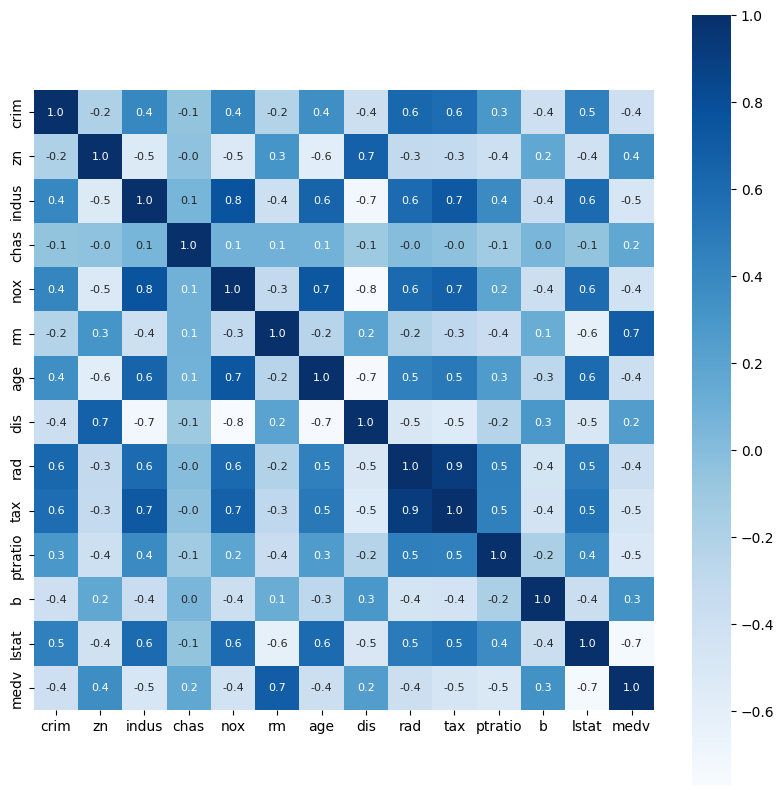

In [35]:
#COnstruct a heatmap for correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot=True, annot_kws={'size':8},cmap = 'Blues')

Splitting feature and target

In [37]:
x = dataset.drop(['medv'],axis=1)
y = dataset['medv']

In [38]:
print(x)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio       b  lstat
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3  396.90   4.98
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8  396.90   9.14
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8  392.83   4.03
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7  394.63   2.94
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7  396.90   5.33
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...      ...     ...    ...
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273     21.0  391.99   9.67
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273     21.0  396.90   9.08
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273     21.0  396.90   5.64
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889 

In [39]:
print(y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64


Splitting training and test

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

Model Training

In [42]:
#Load Model
model = XGBRegressor()

In [44]:
#TRAIN THE MODEL
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

In [45]:
#Prediction on Training Data
train_prediction = model.predict(x_train)

In [49]:
#R square error
score_1 = metrics.r2_score(train_prediction,y_train)
print(score_1)

0.9999980033283415


In [52]:
#Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_train,train_prediction)
print(score_2)

0.0091330346494618


Visualize the Data

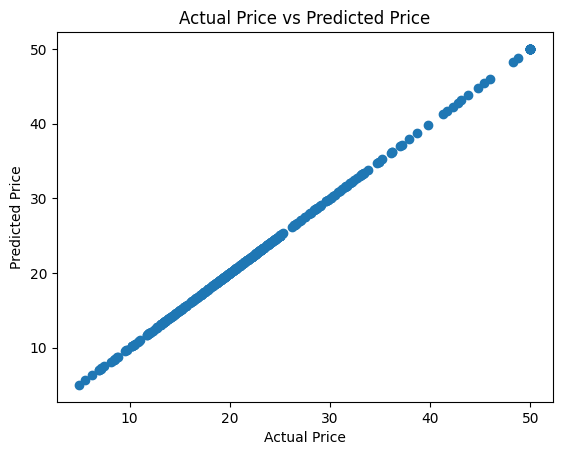

In [59]:
plt.scatter(y_train,train_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Actual Price vs Predicted Price")
plt.show()

In [53]:
#Prediction on Test Data
test_prediction = model.predict(x_test)

In [70]:
type(x_test)

pandas.core.frame.DataFrame

In [55]:
#R square error
score_1 = metrics.r2_score(test_prediction,y_test)
print(score_1)

0.8981202947242624


In [56]:
#Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_test,test_prediction)
print(score_2)

2.0748727686264927


Visualize the Data

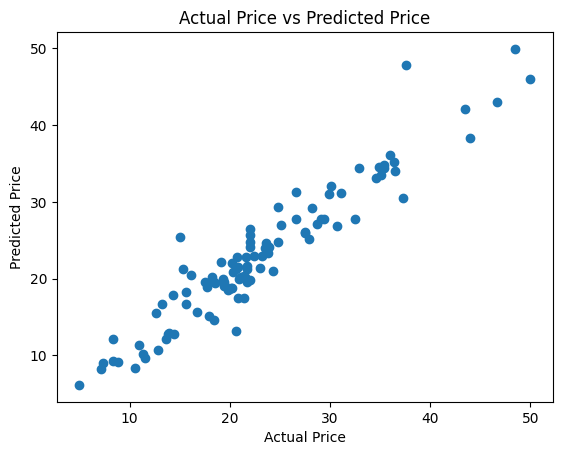

In [60]:
plt.scatter(y_test,test_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Actual Price vs Predicted Price")
plt.show()

Input data

In [73]:
input_data = (0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45)

In [74]:
data = np.asarray(input_data)

In [75]:
input = data.reshape(1,-1)

In [76]:
input.shape

(1, 13)

In [77]:
prediction = model.predict(input)
print("Predicted Price of the Input:", prediction)

Predicted Price of the Input: [15.007718]


Actual Price : 15 <br> Predicted Price: 15.007718 ~ 15